<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Variables-to-control" data-toc-modified-id="Variables-to-control-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Variables to control</a></span></li><li><span><a href="#Load-and-plot-results" data-toc-modified-id="Load-and-plot-results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and plot results</a></span></li></ul></div>

# Validate 3 channels optimal configuration results

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from qcd.optimizationresults import GlobalOptimizationResultsFullUniversal
from qcd import save_object_to_disk, load_object_from_file
import matplotlib.pyplot as plt
import numpy as np

## Variables to control

In [2]:
# Filenames with results for 3 etas and their optimized parameters to LOAD
filename = '20210423a_C2c_A1_2000_10000_3_6_20'
path = 'results/'

## Load and plot results

In [3]:
results = GlobalOptimizationResultsFullUniversal.load_results(file_name=filename,path=path)

In [4]:
results.validate_optimal_configurations(plays=100000)

number of eta groups to validate: 120
Going to validate this eta group: (0, 29, 0)
Optimal Probability: 42.1% Validated Probability: 41.58 % Difference (absolute value): 0.51%
Group of etas # 0 of 120
total time taken so far: 0 minutes and 0 seconds
Going to validate this eta group: (0, 59, 0)
Optimal Probability: 58.92% Validated Probability: 58.28 % Difference (absolute value): 0.63%
Group of etas # 20 of 120
total time taken so far: 0 minutes and 10 seconds
Going to validate this eta group: (0, 90, 0)
Optimal Probability: 66.66% Validated Probability: 66.65 % Difference (absolute value): 0.01%
Group of etas # 40 of 120
total time taken so far: 0 minutes and 20 seconds
Going to validate this eta group: (29, 59, 0)
Optimal Probability: 58.67% Validated Probability: 58.34 % Difference (absolute value): 0.33%
Group of etas # 60 of 120
total time taken so far: 0 minutes and 30 seconds
Going to validate this eta group: (29, 90, 0)
Optimal Probability: 66.62% Validated Probability: 66.62 %

In [5]:
save_object_to_disk(results, name='20210424a_C2c_A1_2000_10000_3_6_20_validated_results_100000', path=path)

In [6]:
validated_results = load_object_from_file(name='20210424a_C2c_A1_2000_10000_3_6_20_validated_results_100000', path='results/')

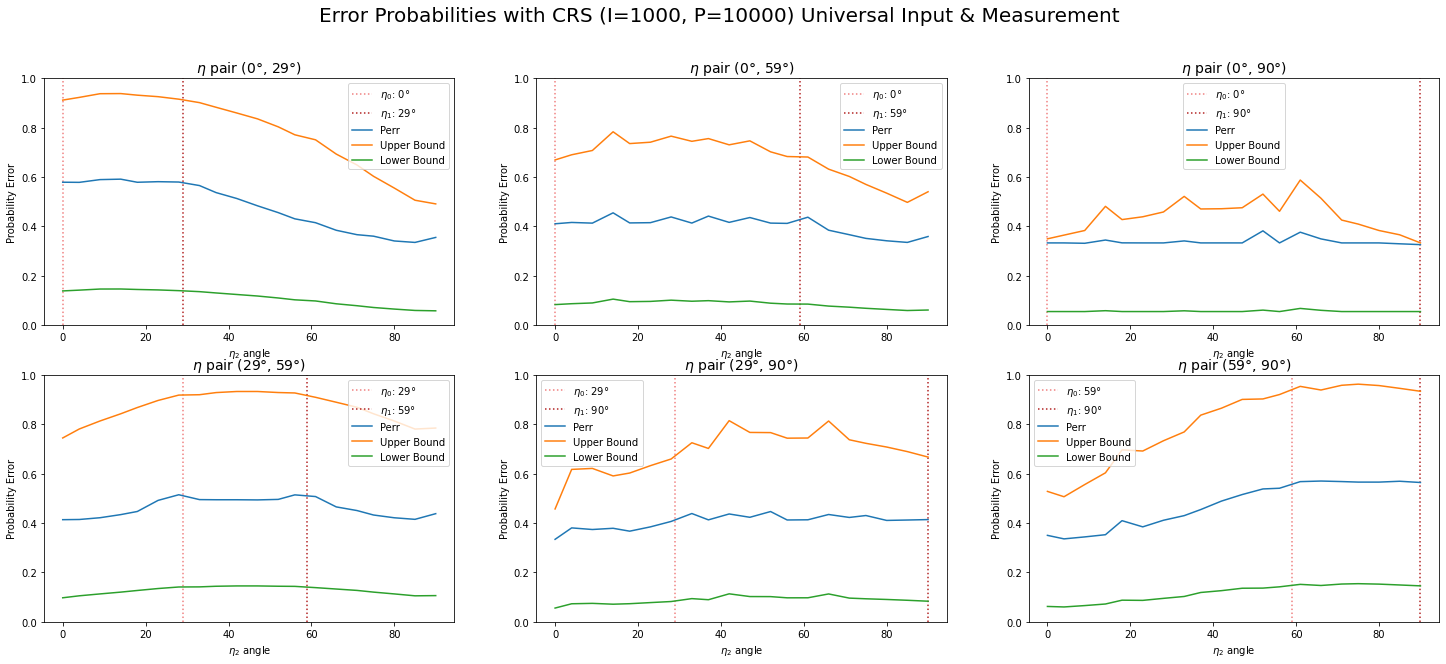

In [7]:
validated_results.plot_3channel_results('CRS (I=1000, P=10000) Universal Input & Measurement')

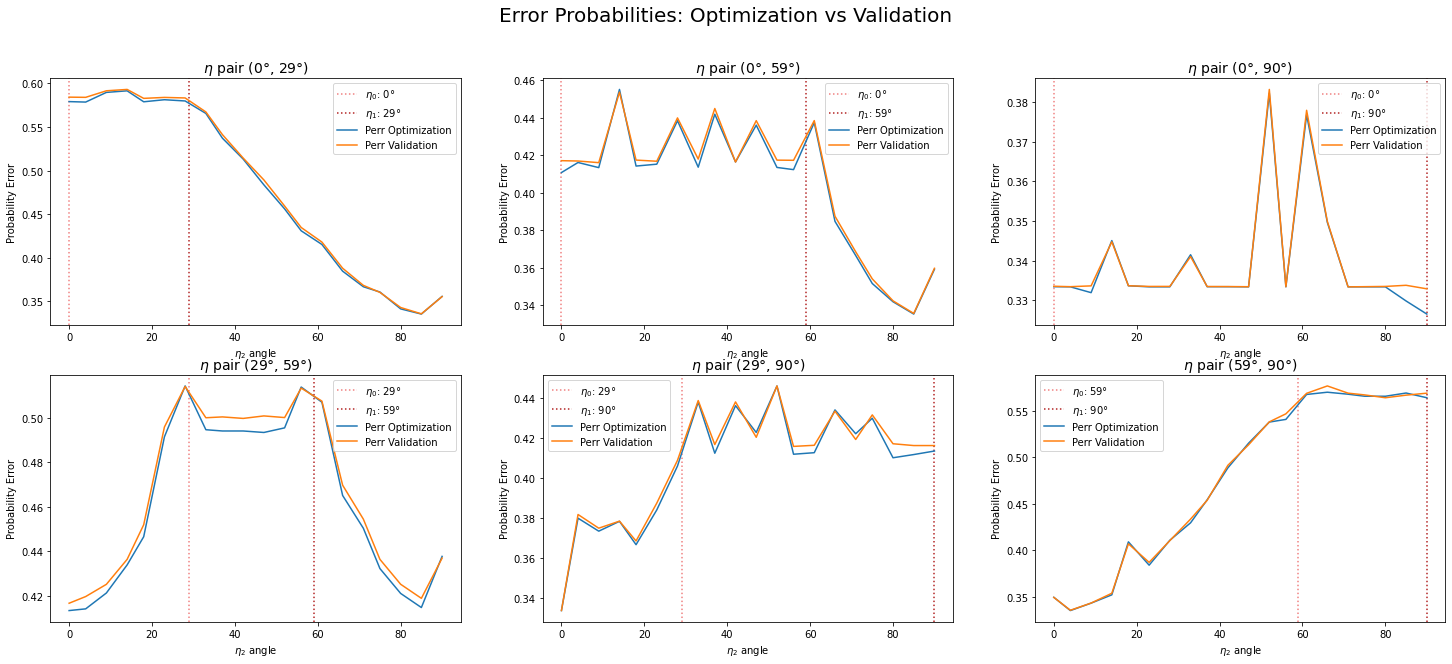

In [8]:
validated_results.plot_global_probabilities()

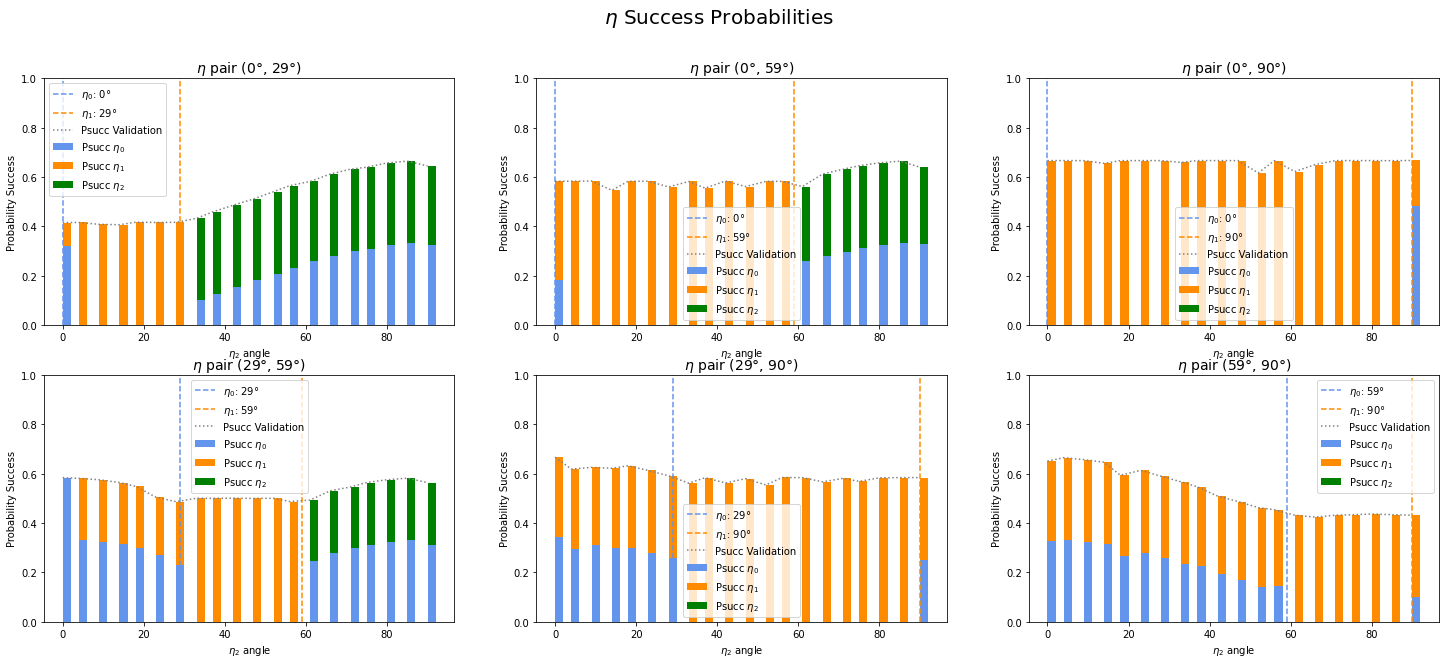

In [9]:
validated_results.plot_eta_success_probabilities()

In [23]:
def plot_eta_assignments(results_to_plot, algorithm: str = '') -> None:
        fig = plt.figure(figsize=(25, 10))
        sup_title = '$\eta$ assigned'
        sup_title += f' with {algorithm}' if algorithm != '' else ''
        fig.suptitle(sup_title, fontsize=20)
        # Get some pastel shades for the colors
        colors = plt.cm.BuPu(np.linspace(0, 0.5, 4))

        for idx, parsed_result in enumerate(results_to_plot):
            if idx > 0:
                break
            title = f"$\eta$ pair ({parsed_result['eta_pair'][0]}\u00B0, {parsed_result['eta_pair'][1]}\u00B0)"
            ax = fig.add_subplot(2, 3, idx + 1 % 3)
            ax.set_title(title, fontsize=14)
            data = [parsed_result['eta_assigned_state_00'],
                   parsed_result['eta_assigned_state_01'],
                   parsed_result['eta_assigned_state_10'],
                   parsed_result['eta_assigned_state_11'],]
            columns = parsed_result['etas_third_channel']
            rows = ('00', '01', '10', '11')
            ax.table(cellText=data,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns)
        plt.show()

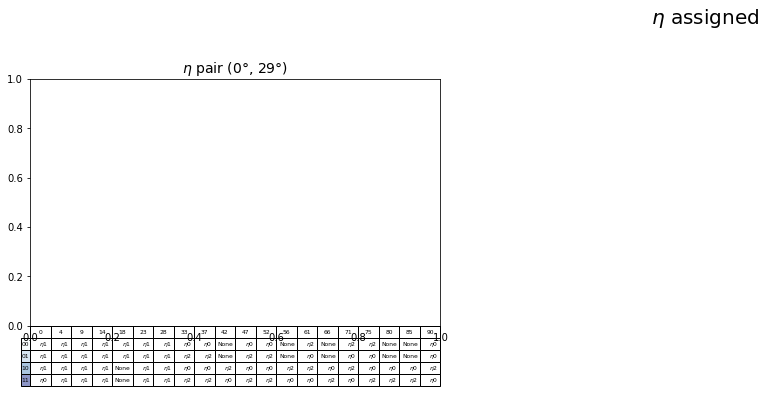

In [24]:
plot_eta_assignments(validated_results.results_to_plot)